In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import binom, poisson, chi2
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# --- Part 1: Probability Distributions ---


# Task 1: Binomial Distribution

In [18]:
# Parameters for binomial distribution:
# n_tosses: Number of coin tosses in each experiment (fixed).
# p_heads: Probability of getting heads in a single toss (constant).
n_tosses = 5
p_heads = 0.5

In [20]:
# Simulate the experiment for different numbers of runs to observe convergence
num_experiments = [10, 100, 1000]


Results for 10 experiments:
Simulated distribution of heads (counts):
{0: 1, 1: 3, 2: 5, 3: 1}
Theoretical PMF:
P(Heads=0) = 0.0312
P(Heads=1) = 0.1562
P(Heads=2) = 0.3125
P(Heads=3) = 0.3125
P(Heads=4) = 0.1562
P(Heads=5) = 0.0312


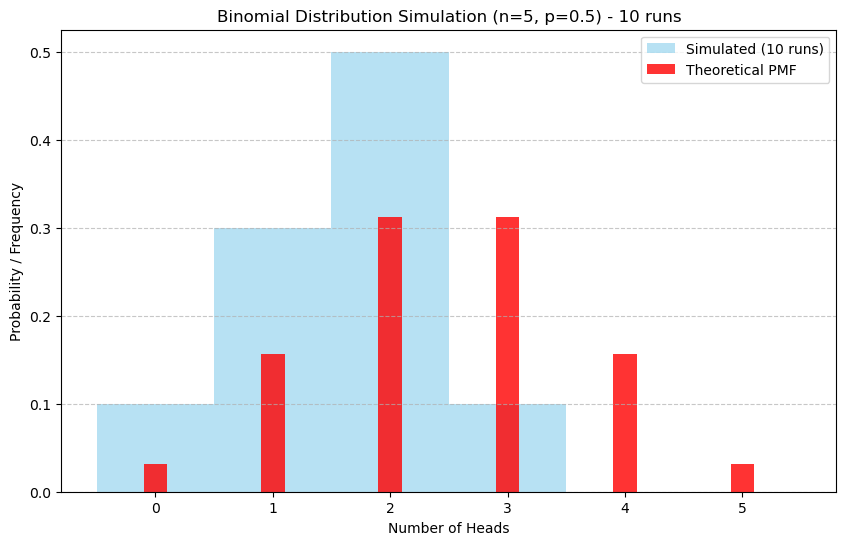


Results for 100 experiments:
Simulated distribution of heads (counts):
{0: 1, 1: 20, 2: 31, 3: 33, 4: 9, 5: 6}
Theoretical PMF:
P(Heads=0) = 0.0312
P(Heads=1) = 0.1562
P(Heads=2) = 0.3125
P(Heads=3) = 0.3125
P(Heads=4) = 0.1562
P(Heads=5) = 0.0312


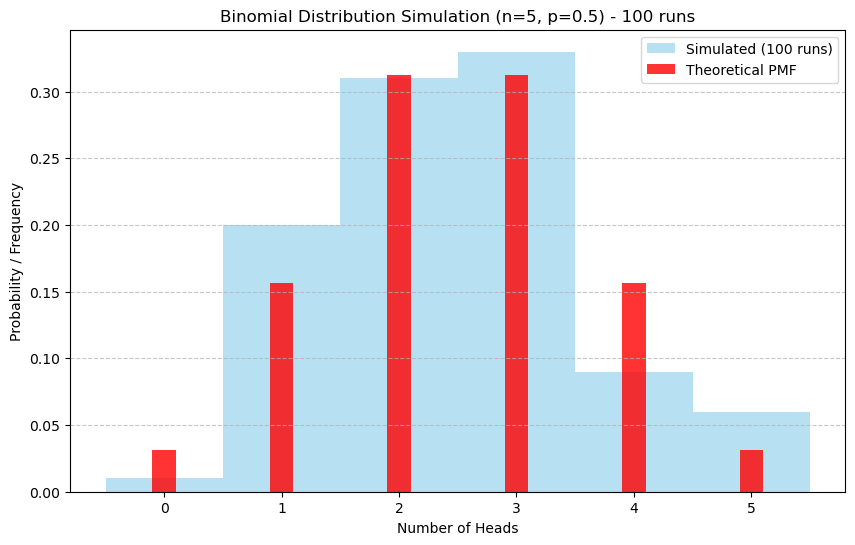


Results for 1000 experiments:
Simulated distribution of heads (counts):
{0: 29, 1: 144, 2: 314, 3: 323, 4: 154, 5: 36}
Theoretical PMF:
P(Heads=0) = 0.0312
P(Heads=1) = 0.1562
P(Heads=2) = 0.3125
P(Heads=3) = 0.3125
P(Heads=4) = 0.1562
P(Heads=5) = 0.0312


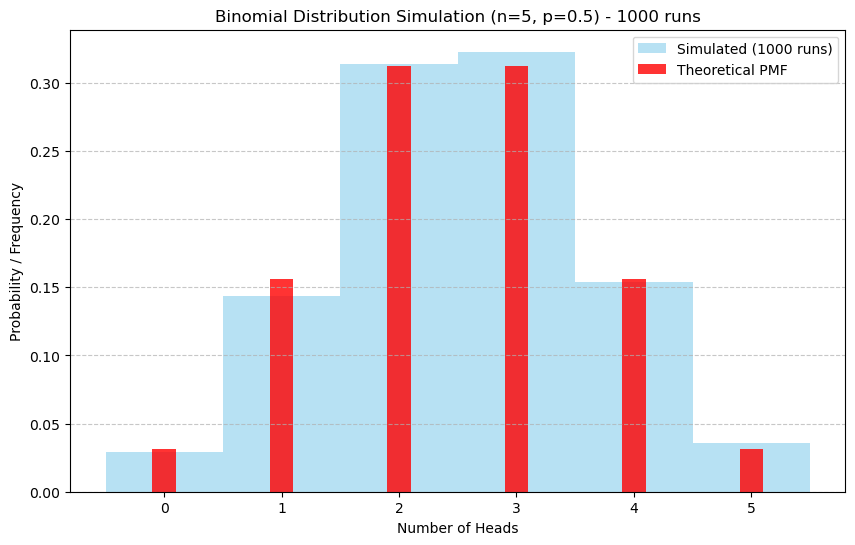

In [22]:
for num_run in num_experiments:
    # Simulate the binomial experiment:
    # np.random.binomial(n, p, size) generates 'size' number of trials.
    # Each trial consists of 'n' independent Bernoulli trials (coin tosses),
    # where each Bernoulli trial has a success probability 'p'.
    # Here, each 'run' is an experiment of 5 coin tosses, and we repeat this 'num_run' times.
    simulated_heads = np.random.binomial(n_tosses, p_heads, num_run)

    # Calculate the theoretical Probability Mass Function (PMF) for the binomial distribution:
    # The possible number of heads ranges from 0 to n_tosses (5).
    x = np.arange(0, n_tosses + 1)
    theoretical_pmf = binom.pmf(x, n_tosses, p_heads)

    print(f"\nResults for {num_run} experiments:")
    print("Simulated distribution of heads (counts):")
    # Use np.unique to get the counts of each unique outcome in the simulation.
    unique, counts = np.unique(simulated_heads, return_counts=True)
    simulated_counts = dict(zip(unique, counts))
    print(simulated_counts)

    print("Theoretical PMF:")
    # Print the theoretical PMF for each possible number of heads.
    for val, prob in zip(x, theoretical_pmf):
        print(f"P(Heads={val}) = {prob:.4f}")

    # Plotting for comparison: Histogram for simulated data vs. Bar plot for theoretical PMF.
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_heads, bins=np.arange(-0.5, n_tosses + 1.5, 1), density=True,
             alpha=0.6, color='skyblue', label=f'Simulated ({num_run} runs)')
    plt.bar(x, theoretical_pmf, width=0.2, alpha=0.8, color='red', label='Theoretical PMF')
    plt.title(f'Binomial Distribution Simulation (n={n_tosses}, p={p_heads}) - {num_run} runs')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability / Frequency')
    plt.xticks(x)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Task 2: Poisson Distribution

In [25]:
# Parameter for Poisson distribution:
# lambda_signups: Average rate of user sign-ups per hour.
lambda_signups = 3

# Simulate the experiment for different numbers of runs.
num_experiments = [10, 100, 1000]



Results for 10 experiments:
Simulated distribution of sign-ups (counts):
{1: 2, 2: 2, 3: 3, 4: 1, 5: 1, 6: 1}
Theoretical PMF (first few values):
P(Sign-ups=0) = 0.0498
P(Sign-ups=1) = 0.1494
P(Sign-ups=2) = 0.2240
P(Sign-ups=3) = 0.2240
P(Sign-ups=4) = 0.1680
P(Sign-ups=5) = 0.1008
P(Sign-ups=6) = 0.0504
P(Sign-ups=7) = 0.0216
P(Sign-ups=8) = 0.0081
P(Sign-ups=9) = 0.0027


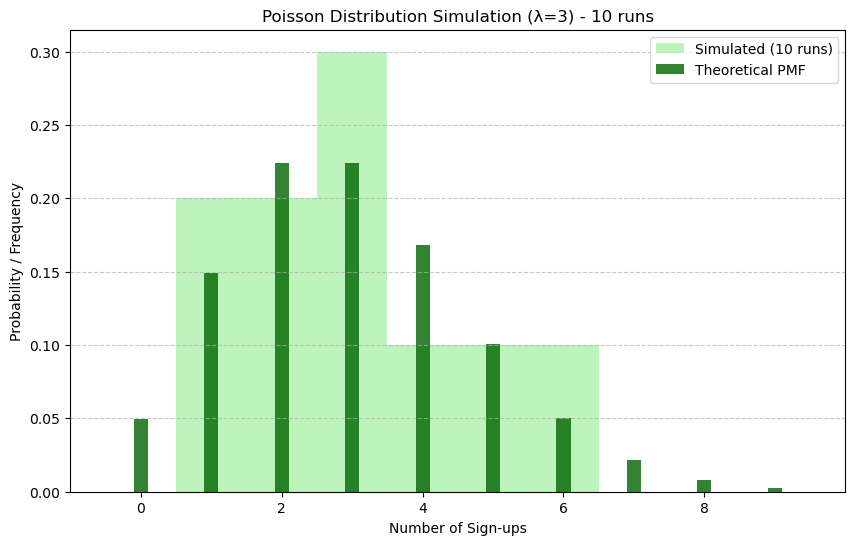


Results for 100 experiments:
Simulated distribution of sign-ups (counts):
{0: 2, 1: 16, 2: 22, 3: 26, 4: 19, 5: 9, 6: 5, 8: 1}
Theoretical PMF (first few values):
P(Sign-ups=0) = 0.0498
P(Sign-ups=1) = 0.1494
P(Sign-ups=2) = 0.2240
P(Sign-ups=3) = 0.2240
P(Sign-ups=4) = 0.1680
P(Sign-ups=5) = 0.1008
P(Sign-ups=6) = 0.0504
P(Sign-ups=7) = 0.0216
P(Sign-ups=8) = 0.0081
P(Sign-ups=9) = 0.0027


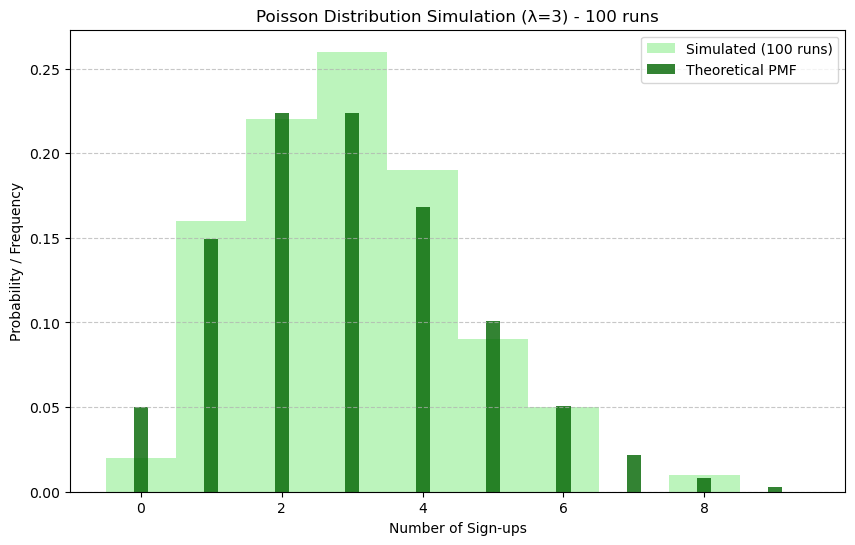


Results for 1000 experiments:
Simulated distribution of sign-ups (counts):
{0: 39, 1: 152, 2: 227, 3: 246, 4: 159, 5: 91, 6: 52, 7: 20, 8: 12, 9: 1, 10: 1}
Theoretical PMF (first few values):
P(Sign-ups=0) = 0.0498
P(Sign-ups=1) = 0.1494
P(Sign-ups=2) = 0.2240
P(Sign-ups=3) = 0.2240
P(Sign-ups=4) = 0.1680
P(Sign-ups=5) = 0.1008
P(Sign-ups=6) = 0.0504
P(Sign-ups=7) = 0.0216
P(Sign-ups=8) = 0.0081
P(Sign-ups=9) = 0.0027


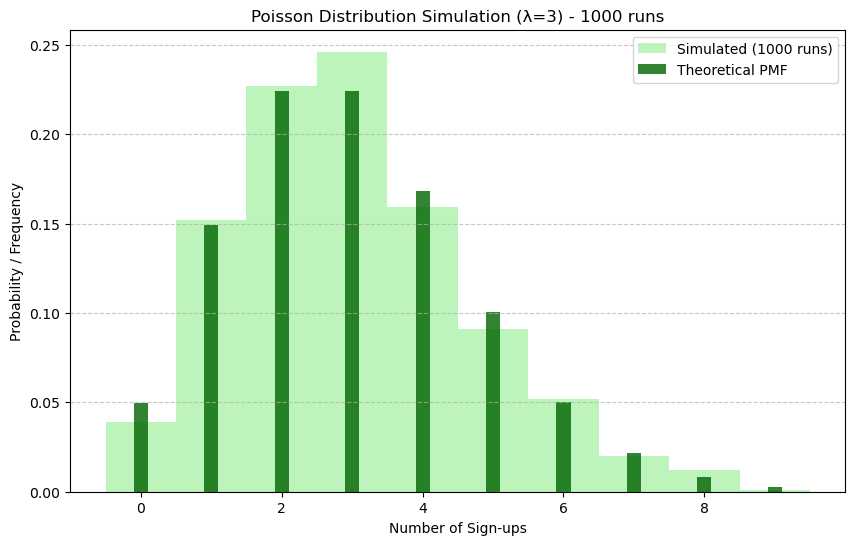

In [27]:
for num_run in num_experiments:
    # Simulate the Poisson experiment:
    # np.random.poisson(lam, size) generates 'size' number of samples
    # from a Poisson distribution with parameter 'lam' (lambda).
    simulated_signups = np.random.poisson(lambda_signups, num_run)

    # Calculate the theoretical PMF for the Poisson distribution:
    # We need a reasonable range of x values for plotting. A common rule of thumb
    # is to go up to lambda + 3*sqrt(lambda) or where the PMF becomes very small.
    max_val = int(lambda_signups + 3 * np.sqrt(lambda_signups)) + 2
    x = np.arange(0, max_val)
    theoretical_pmf = poisson.pmf(x, lambda_signups)

    print(f"\nResults for {num_run} experiments:")
    print("Simulated distribution of sign-ups (counts):")
    unique, counts = np.unique(simulated_signups, return_counts=True)
    simulated_counts = dict(zip(unique, counts))
    print(simulated_counts)

    print("Theoretical PMF (first few values):")
    # Print only the first 10 values for brevity, as Poisson can have a long tail.
    for val, prob in zip(x[:10], theoretical_pmf[:10]):
        print(f"P(Sign-ups={val}) = {prob:.4f}")

    # Plotting for comparison: Histogram for simulated data vs. Bar plot for theoretical PMF.
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_signups, bins=np.arange(-0.5, max_val + 0.5, 1), density=True,
             alpha=0.6, color='lightgreen', label=f'Simulated ({num_run} runs)')
    plt.bar(x, theoretical_pmf, width=0.2, alpha=0.8, color='darkgreen', label='Theoretical PMF')
    plt.title(f'Poisson Distribution Simulation (λ={lambda_signups}) - {num_run} runs')
    plt.xlabel('Number of Sign-ups')
    plt.ylabel('Probability / Frequency')
    plt.xticks(x[::2]) # Show every other x-tick for clarity
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Task 3: Chi-Square Distribution

In [30]:
# Parameter for Chi-Square distribution:
# df_chisquare: Degrees of freedom. The shape of the Chi-Square distribution
# depends on its degrees of freedom.
df_chisquare = 2

# Simulate the experiment for different numbers of measurements.
num_measurements = [10, 100, 1000]


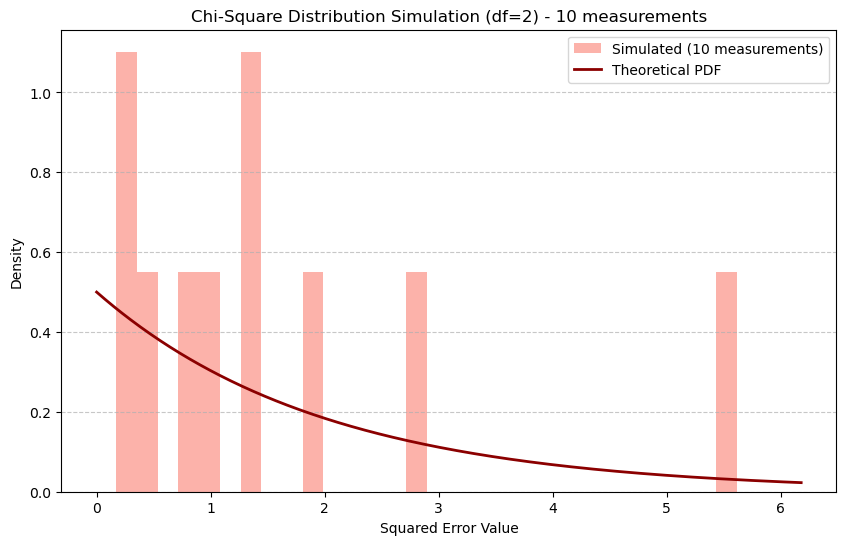

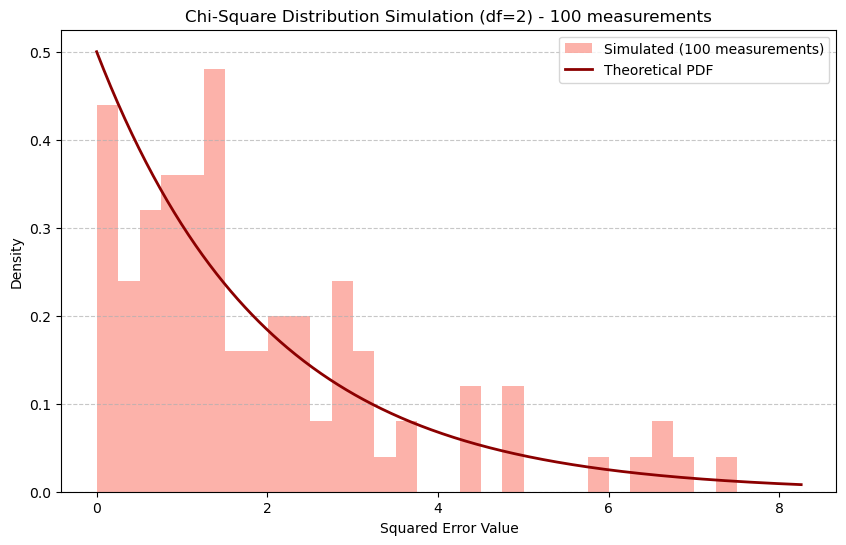

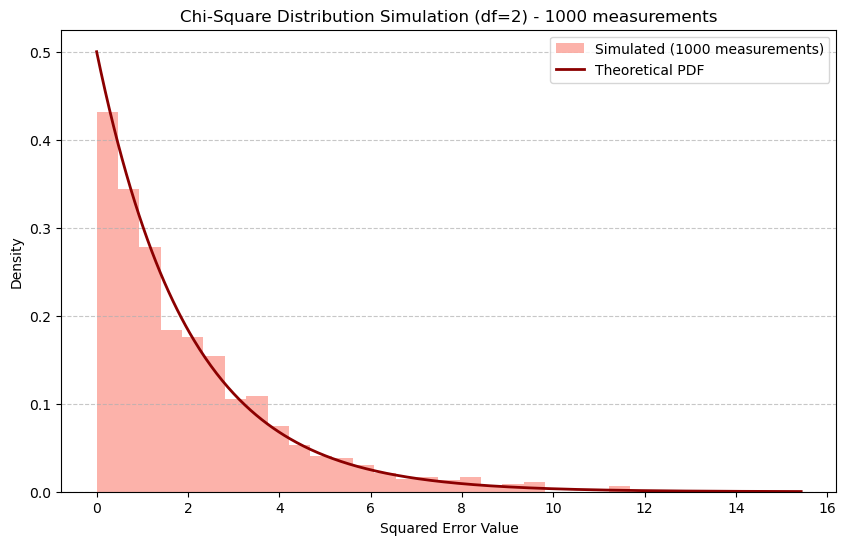


--- End of Part 1 ---


In [32]:
for num_meas in num_measurements:
    # Simulate the Chi-Square experiment:
    # np.random.chisquare(df, size) generates 'size' number of samples
    # from a Chi-Square distribution with 'df' degrees of freedom.
    simulated_errors = np.random.chisquare(df_chisquare, num_meas)

    # Plotting histogram of simulated data.
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_errors, bins=30, density=True, alpha=0.6,
             color='salmon', label=f'Simulated ({num_meas} measurements)')

    # Plotting theoretical Probability Density Function (PDF):
    # For continuous distributions, we plot the PDF, which describes the likelihood
    # of a random variable falling within a given range of values.
    # Create a smooth range for x values for the PDF plot.
    x = np.linspace(0, np.max(simulated_errors) * 1.1, 500)
    theoretical_pdf = chi2.pdf(x, df_chisquare)
    plt.plot(x, theoretical_pdf, color='darkred', linestyle='-',
             linewidth=2, label='Theoretical PDF')

    plt.title(f'Chi-Square Distribution Simulation (df={df_chisquare}) - {num_meas} measurements')
    plt.xlabel('Squared Error Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

print("\n--- End of Part 1 ---")

# --- Part 2: Hypothesis Testing ---


In [35]:
# Load the dataset
try:
    car_data = pd.read_csv('car_sales_cleaned.csv')
    print("\nDataset 'car_sales_cleaned.csv' loaded successfully.")
    # Added this print statement to confirm successful loading
    print("Confirming 'car_data' is defined and loaded:", 'car_data' in locals())
    print("First 5 rows of the dataset:")
    print(car_data.head())
    print("\nDataset Information:")
    print(car_data.info())
except FileNotFoundError:
    print("Error: 'car_sales_cleaned.csv' not found. Please ensure the file is in the same directory as the script.")
    exit() # Exit the script if the file is not found.


Dataset 'car_sales_cleaned.csv' loaded successfully.
Confirming 'car_data' is defined and loaded: True
First 5 rows of the dataset:
   Unnamed: 0  year   make                model        trim   body  \
0           0  2015    Kia              Sorento          LX    SUV   
1           1  2015    Kia              Sorento          LX    SUV   
2           2  2014    BMW             3 Series  328i SULEV  Sedan   
3           3  2015  Volvo                  S60          T5  Sedan   
4           4  2014    BMW  6 Series Gran Coupe        650i  Sedan   

  transmission                vin state  condition  odometer  color interior  \
0    automatic  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1    automatic  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2    automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3    automatic  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4    automatic  wba6b2c57ed129731    ca       

# Task 1: One-Way ANOVA (Toyota Resale Price)
### Question: Is the average resale price of Toyota cars really ₹12,400, as some believe?
### We'll use a significance level (alpha) of 0.05.


Dataset 'car_sales_cleaned.csv' loaded successfully.
First 5 rows of the dataset:
   Unnamed: 0  year   make                model        trim   body  \
0           0  2015    Kia              Sorento          LX    SUV   
1           1  2015    Kia              Sorento          LX    SUV   
2           2  2014    BMW             3 Series  328i SULEV  Sedan   
3           3  2015  Volvo                  S60          T5  Sedan   
4           4  2014    BMW  6 Series Gran Coupe        650i  Sedan   

  transmission                vin state  condition  odometer  color interior  \
0    automatic  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1    automatic  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2    automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3    automatic  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4    automatic  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

               

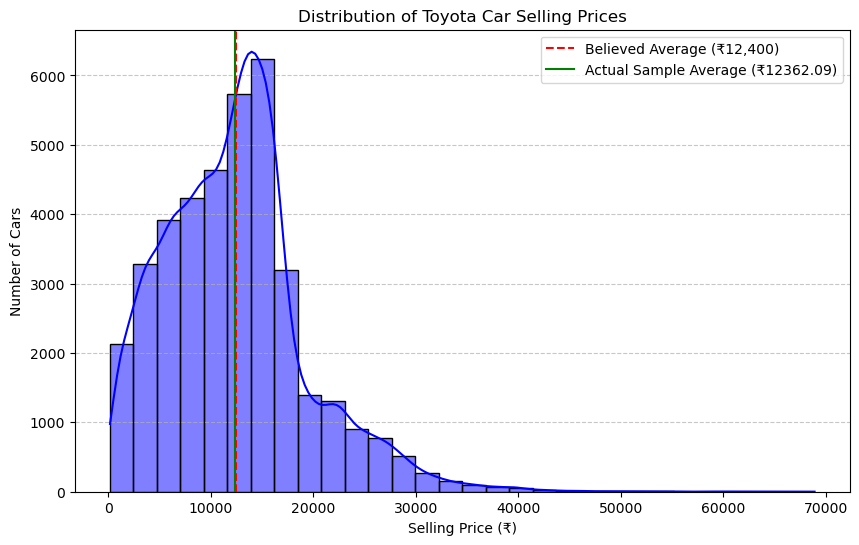


--- End of Task 1 ---


In [56]:
# Step 1: Load the car sales dataset.
# This is the first crucial step: getting our data ready.
try:
    car_data = pd.read_csv('car_sales_cleaned.csv')
    print("\nDataset 'car_sales_cleaned.csv' loaded successfully.")
    print("First 5 rows of the dataset:")
    print(car_data.head())
    print("\nDataset Information:")
    print(car_data.info())
except FileNotFoundError:
    print("ERROR: The file 'car_sales_cleaned.csv' was not found.")
    print("Please make sure the CSV file is in the same folder as this Python script.")
    exit() # Stop the script if the file isn't found, as we can't proceed without it.

# Step 2: Filter data for Toyota cars and their 'sellingprice'.
# We select rows where the 'make' column is 'Toyota' (all lowercase, as per your file's columns)
# and then get their 'sellingprice' (all lowercase, as per your file's columns).
toyota_prices = car_data[car_data['make'] == 'Toyota']['sellingprice']

# Check if we actually found any Toyota cars in the data.
if toyota_prices.empty:
    print("\nNo Toyota cars found in the dataset. Cannot perform this test.")
else:
    # Step 3: Define our hypotheses (the statements we want to test).
    # Null Hypothesis (H0): The true average resale price of Toyota cars IS ₹12,400. (μ = 12400)
    # Alternative Hypothesis (H1): The true average resale price of Toyota cars IS NOT ₹12,400. (μ ≠ 12400)

    # Step 4: Perform the One-Sample T-Test.
    # This test compares the average of our sample (Toyota cars) to a specific number (₹12,400).
    # 'popmean' is the number we are testing against (our belief).
    t_statistic, p_value = stats.ttest_1samp(toyota_prices, popmean=12400)

    print(f"\n--- Test Results ---")
    print(f"Average selling price for Toyota cars in our data: ₹{toyota_prices.mean():.2f}")
    print(f"How spread out the prices are (Standard Deviation): ₹{toyota_prices.std():.2f}")
    print(f"Number of Toyota cars in our data: {len(toyota_prices)}")
    print(f"T-statistic (a measure of how far our sample mean is from the hypothesized mean): {t_statistic:.4f}")
    print(f"P-value (the probability of seeing our data if the belief were true): {p_value:.4f}")
    print(f"Our chosen significance level (alpha): {0.05}")

    # Step 5: Make a decision based on the P-value.
    # If P-value is small (less than alpha), it means our data is unlikely if H0 is true,
    # so we reject H0. If P-value is large, our data is consistent with H0, so we don't reject it.
    if p_value < 0.05:
        print("\nDecision: Reject the Null Hypothesis (H0).")
        print("Conclusion: Based on this data (P-value < 0.05), there's statistically significant evidence to suggest that the average resale price of Toyota cars is NOT ₹12,400.")
    else:
        print("\nDecision: Fail to Reject the Null Hypothesis (H0).")
        print("Conclusion: Based on this data (P-value >= 0.05), there's not enough statistically significant evidence to suggest that the average resale price of Toyota cars is different from ₹12,400.")

    # Optional: Visualize the distribution of Toyota prices:
    plt.figure(figsize=(10, 6))
    sns.histplot(toyota_prices, kde=True, color='blue', bins=30)
    plt.axvline(x=12400, color='red', linestyle='--', label='Believed Average (₹12,400)')
    plt.axvline(x=toyota_prices.mean(), color='green', linestyle='-', label=f'Actual Sample Average (₹{toyota_prices.mean():.2f})')
    plt.title('Distribution of Toyota Car Selling Prices')
    plt.xlabel('Selling Price (₹)')
    plt.ylabel('Number of Cars')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

print("\n--- End of Task 1 ---")

# --- Task 2: Two-Way ANOVA (Black Car Resale Price Factors) ---
### Question: For black cars, do 'body type' (like SUV, Sedan) and 'transmission'
### (Automatic or Manual) affect the resale price? Does their combination have
### any extra effect?
### We'll use a significance level (alpha) of 0.05 and a sample of 5000 cars

In [64]:
# Step 1: Load the car sales dataset.
try:
    car_data = pd.read_csv('car_sales_cleaned.csv')
    print("\nDataset 'car_sales_cleaned.csv' loaded successfully for Task 2.")
    print("First 5 rows of the dataset:")
    print(car_data.head())
    print("\nDataset Information:")
    print(car_data.info())
except FileNotFoundError:
    print("ERROR: The file 'car_sales_cleaned.csv' was not found.")
    print("Please make sure the CSV file is in the same folder as this Python script.")
    exit() # Stop the script if the file isn't found.

# Step 2: Filter data for only black cars.
# We select rows where the 'color' column is 'Black' (all lowercase, as per your file's columns).
black_cars = car_data[car_data['color'] == 'Black']

# Check if we found any black cars in the data.
if black_cars.empty:
    print("\nNo black cars found in the dataset. Cannot perform Two-Way ANOVA.")
else:
    # Step 3: Prepare the data for ANOVA.
    # We need to tell Python that 'body' and 'transmission' are categories, not numbers.
    # Corrected column names: 'body' and 'transmission'
    black_cars['body'] = black_cars['body'].astype('category')
    black_cars['transmission'] = black_cars['transmission'].astype('category')

    # The problem asks for a sample of 5000 cars. If we have more, we'll pick 5000 randomly.
    if len(black_cars) > 5000:
        # Use .copy() to avoid SettingWithCopyWarning, ensuring operations are on a new DataFrame.
        black_cars_sample = black_cars.sample(n=5000, random_state=42).copy()
        print(f"\nTaken a random sample of 5000 black cars for Two-Way ANOVA.")
    else:
        black_cars_sample = black_cars.copy()
        print(f"\nUsing all {len(black_cars_sample)} black cars for Two-Way ANOVA (less than 5000 available).")

    # Remove any rows where 'sellingprice', 'body', or 'transmission' are missing (NaN),
    # because ANOVA cannot handle missing data.
    # Corrected column names: 'sellingprice', 'body', 'transmission'
    black_cars_sample.dropna(subset=['sellingprice', 'body', 'transmission'], inplace=True)

    # Check if there's still enough data after dropping NaNs and if there are enough categories
    if black_cars_sample.empty or black_cars_sample['body'].nunique() < 2 or black_cars_sample['transmission'].nunique() < 2:
        print("\nNot enough valid data or unique categories after sampling and cleaning for Two-Way ANOVA.")
        print(f"Unique Body Types: {black_cars_sample['body'].nunique()}")
        print(f"Unique Transmission Types: {black_cars_sample['transmission'].nunique()}")
        print(f"Total rows for analysis: {len(black_cars_sample)}")
    else:
        # Step 4: Define our hypotheses for Two-Way ANOVA.
        # This test will evaluate three things:
        # 1. Main effect of Body Type: Does Body Type alone influence price?
        # 2. Main effect of Transmission: Does Transmission Type alone influence price?
        # 3. Interaction effect: Does the *combination* of Body Type and Transmission have an
        #    additional influence on price that's more than just their individual effects?

        # Hypotheses:
        # H0 (Null Hypothesis) for Body Type: There is no significant effect of Body Type on the resale price of black cars.
        # H1 (Alternative Hypothesis) for Body Type: There is a significant effect of Body Type on the resale price of black cars.
        #
        # H0 (Null Hypothesis) for Transmission: There is no significant effect of Transmission Type on the resale price of black cars.
        # H1 (Alternative Hypothesis) for Transmission: There is a significant effect of Transmission Type on the resale price of black cars.
        #
        # H0 (Null Hypothesis) for Interaction: There is no significant interaction effect between Body Type and Transmission Type
        #                                     on the resale price of black cars.
        # H1 (Alternative Hypothesis) for Interaction: There is a significant interaction effect between Body Type and Transmission Type
        #                                            on the resale price of black cars.

        # Step 5: Perform the Two-Way ANOVA.
        # We create a "formula" that describes our statistical model:
        # 'sellingprice' is the variable we're trying to explain (dependent variable).
        # 'C(body)' and 'C(transmission)' are our main factors (independent variables).
        #   'C()' tells statsmodels that these are categorical variables.
        # 'C(body):C(transmission)' represents the interaction effect.
        # Corrected formula with 'sellingprice', 'body', 'transmission'
        formula = 'sellingprice ~ C(body) + C(transmission) + C(body):C(transmission)'

        try:
            # Fit the Ordinary Least Squares (OLS) model to our sample data.
            model = ols(formula, data=black_cars_sample).fit()
            # Generate the ANOVA table. typ=2 specifies Type 2 sum of squares,
            # which is generally appropriate for unbalanced designs (when group sizes are unequal),
            # which is common with real-world data.
            anova_table = anova_lm(model, typ=2)
            print("\n--- Two-Way ANOVA Table ---")
            print("Look at the 'PR(>F)' column for the P-values.")
            print(anova_table)

            # Step 6: Make decisions based on the P-values from the ANOVA table.
            # Our significance level (alpha) is 0.05.
            # If P-value < 0.05, we reject the Null Hypothesis (H0) for that effect.
            # If P-value >= 0.05, we fail to reject the Null Hypothesis (H0) for that effect.
            alpha = 0.05

            print("\n--- Conclusions for Two-Way ANOVA ---")
            # Conclusion for Body Type effect:
            # Corrected index name for 'body' in anova_table
            if 'C(body)' in anova_table.index and anova_table.loc['C(body)', 'PR(>F)'] < alpha:
                print(f"Body Type (P-value={anova_table.loc['C(body)', 'PR(>F)']:.4f}):")
                print("  Decision: Reject H0. There is a STATISTICALLY SIGNIFICANT effect of Body Type on the resale price of black cars.")
            else:
                print(f"Body Type (P-value={anova_table.loc['C(body)', 'PR(>F)']:.4f}):")
                print("  Decision: Fail to Reject H0. There is NO STATISTICALLY SIGNIFICANT effect of Body Type on the resale price of black cars.")

            # Conclusion for Transmission effect:
            # Corrected index name for 'transmission' in anova_table
            if 'C(transmission)' in anova_table.index and anova_table.loc['C(transmission)', 'PR(>F)'] < alpha:
                print(f"Transmission (P-value={anova_table.loc['C(transmission)', 'PR(>F)']:.4f}):")
                print("  Decision: Reject H0. There is a STATISTICALLY SIGNIFICANT effect of Transmission Type on the resale price of black cars.")
            else:
                print(f"Transmission (P-value={anova_table.loc['C(transmission)', 'PR(>F)']:.4f}):")
                print("  Decision: Fail to Reject H0. There is NO STATISTICALLY SIGNIFICANT effect of Transmission Type on the resale price of black cars.")

            # Conclusion for Interaction effect:
            # Corrected index name for interaction in anova_table
            if 'C(body):C(transmission)' in anova_table.index and anova_table.loc['C(body):C(transmission)', 'PR(>F)'] < alpha:
                print(f"Interaction (Body Type * Transmission) (P-value={anova_table.loc['C(body):C(transmission)', 'PR(>F)']:.4f}):")
                print("  Decision: Reject H0. There IS a STATISTICALLY SIGNIFICANT INTERACTION effect between Body Type and Transmission Type on the resale price of black cars.")
                print("  This means the effect of Body Type on price depends on the Transmission Type, and vice-versa.")
            else:
                print(f"Interaction (Body Type * Transmission) (P-value={anova_table.loc['C(body):C(transmission)', 'PR(>F)']:.4f}):")
                print("  Decision: Fail to Reject H0. There is NO STATISTICALLY SIGNIFICANT INTERACTION effect between Body Type and Transmission Type on the resale price of black cars.")
                print("  This means the effects of Body Type and Transmission on price are largely independent of each other.")

            # Optional: Visualize the interaction effect using a point plot.
            # This plot helps us see how the average selling price changes for different
            # body types, and how that change differs between automatic and manual transmissions.
            # Corrected column names: 'body', 'sellingprice', 'transmission'
            plt.figure(figsize=(12, 7))
            sns.pointplot(data=black_cars_sample, x='body', y='sellingprice', hue='transmission',
                          errorbar='sd', capsize=0.1, dodge=True, palette='viridis')
            plt.title('Interaction Plot: Average Selling Price by Body Type and Transmission for Black Cars')
            plt.xlabel('Body Type')
            plt.ylabel('Average Selling Price (₹)')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability.
            plt.tight_layout() # Adjust layout to prevent labels from overlapping.
            plt.show()

        except ValueError as e:
            print(f"ERROR performing Two-Way ANOVA: {e}")
            print("This error might occur if there are too few unique combinations of Body Type and Transmission,")
            print("or if a specific category has only one observation after sampling and dropping NaNs.")
            print("Please check the unique values and counts for 'body' and 'transmission' in your sample:")
            print("Body Type categories in sample:", black_cars_sample['body'].unique())
            print("Transmission categories in sample:", black_cars_sample['transmission'].unique())
            print("Count of each Body Type-Transmission combination in sample:")
            print(black_cars_sample.groupby(['body', 'transmission']).size())

print("\n--- End of Task 2 ---")


Dataset 'car_sales_cleaned.csv' loaded successfully for Task 2.
First 5 rows of the dataset:
   Unnamed: 0  year   make                model        trim   body  \
0           0  2015    Kia              Sorento          LX    SUV   
1           1  2015    Kia              Sorento          LX    SUV   
2           2  2014    BMW             3 Series  328i SULEV  Sedan   
3           3  2015  Volvo                  S60          T5  Sedan   
4           4  2014    BMW  6 Series Gran Coupe        650i  Sedan   

  transmission                vin state  condition  odometer  color interior  \
0    automatic  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1    automatic  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2    automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3    automatic  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4    automatic  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

    

# --- Task 3: Chi-Square Test of Independence (Car Color Distribution) ---
### Question: Is the distribution of Toyota car colors the same as that of all cars?
### Or are Toyota cars more likely to be certain colors compared to the general market?
### We'll use a significance level (alpha) of 0.05.


Dataset 'car_sales_cleaned.csv' loaded successfully for Task 3.
First 5 rows of the dataset:
   Unnamed: 0  year   make                model        trim   body  \
0           0  2015    Kia              Sorento          LX    SUV   
1           1  2015    Kia              Sorento          LX    SUV   
2           2  2014    BMW             3 Series  328i SULEV  Sedan   
3           3  2015  Volvo                  S60          T5  Sedan   
4           4  2014    BMW  6 Series Gran Coupe        650i  Sedan   

  transmission                vin state  condition  odometer  color interior  \
0    automatic  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1    automatic  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2    automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3    automatic  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4    automatic  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

    

<Figure size 1400x700 with 0 Axes>

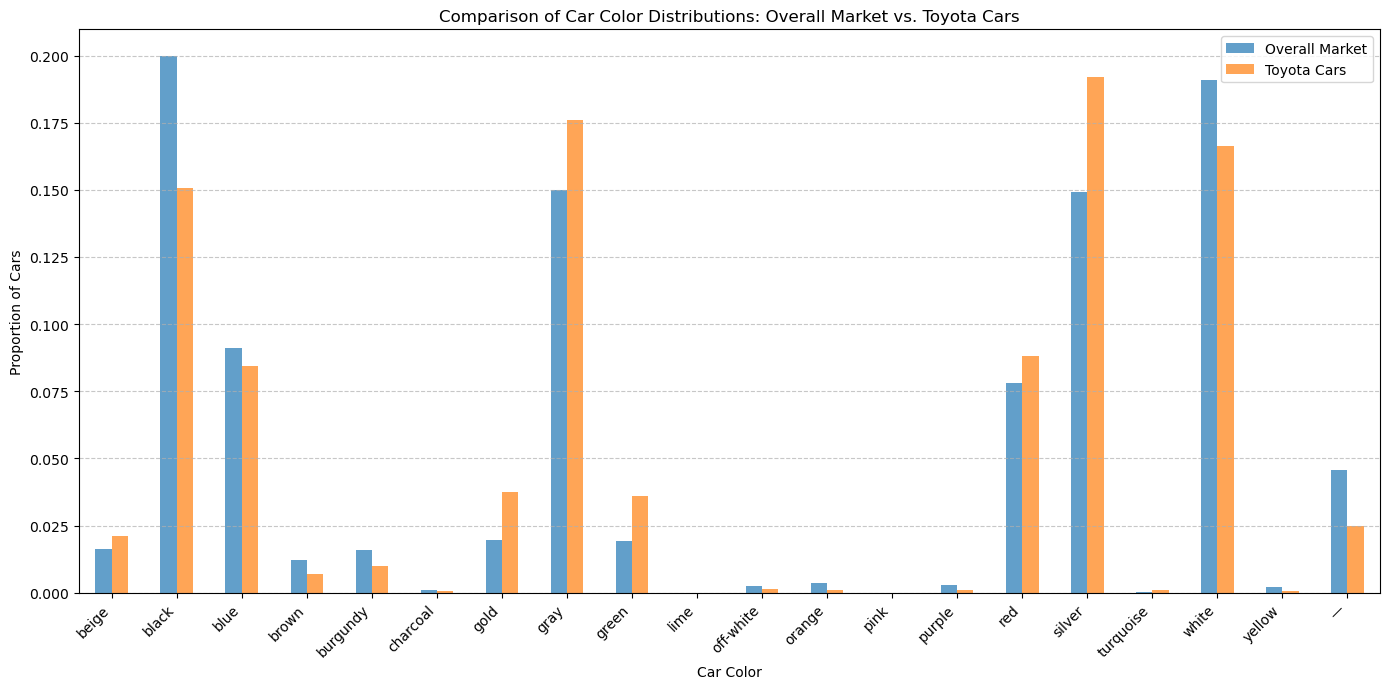


--- End of Task 3 ---


In [69]:
# Step 1: Load the car sales dataset.
try:
    car_data = pd.read_csv('car_sales_cleaned.csv')
    print("\nDataset 'car_sales_cleaned.csv' loaded successfully for Task 3.")
    print("First 5 rows of the dataset:")
    print(car_data.head())
    print("\nDataset Information:")
    print(car_data.info())
except FileNotFoundError:
    print("ERROR: The file 'car_sales_cleaned.csv' was not found.")
    print("Please make sure the CSV file is in the same folder as this Python script.")
    exit() # Stop the script if the file isn't found.

# Step 2: Create a "contingency table" (observed frequencies) for the test.
# This table will show how many cars of each color are 'Toyota' and how many are 'Non-Toyota'.

# Get counts of each car color for the overall market.
# Corrected column name: 'color'
overall_color_counts = car_data['color'].value_counts()

# Filter data for only Toyota cars.
# Corrected column name: 'make'
toyota_cars_only = car_data[car_data['make'] == 'Toyota']
# Get counts of each car color specifically for Toyota cars.
# Corrected column name: 'color'
toyota_color_counts = toyota_cars_only['color'].value_counts()

print("\nCounts of ALL car colors in the dataset:")
print(overall_color_counts)
print("\nCounts of Toyota car colors in the dataset:")
print(toyota_color_counts)

# Get a list of all unique colors present in the dataset.
# Corrected column name: 'color'
all_unique_colors = car_data['color'].unique()

# Create an empty DataFrame to build our observed contingency table.
# Rows will be colors, columns will be 'Toyota' and 'Non-Toyota'.
observed_counts_table = pd.DataFrame(index=all_unique_colors, columns=['Toyota', 'Non-Toyota'])

# Populate the observed counts table:
for color in all_unique_colors:
    # Get the count of Toyota cars for the current color. Use .get(color, 0) to put 0 if color not found.
    observed_counts_table.loc[color, 'Toyota'] = toyota_color_counts.get(color, 0)

    # Count cars that are NOT Toyota but ARE this specific color.
    # Corrected column names: 'make', 'color'
    non_toyota_count = car_data[(car_data['make'] != 'Toyota') & (car_data['color'] == color)].shape[0]
    observed_counts_table.loc[color, 'Non-Toyota'] = non_toyota_count

# Ensure all counts in the table are whole numbers (integers).
observed_counts_table = observed_counts_table.astype(int)

# Remove any rows (colors) from the table that have zero cars in *both* Toyota and Non-Toyota categories.
# These colors don't exist in the relevant subsets and would cause issues for the test.
observed_counts_table = observed_counts_table[(observed_counts_table['Toyota'] > 0) | (observed_counts_table['Non-Toyota'] > 0)]

print("\nObserved Contingency Table (Actual Counts used for Chi-Square Test):")
print(observed_counts_table)

# Step 3: Define our hypotheses for the Chi-Square Test of Independence.
# This test checks if two categorical variables (Car Make and Car Color) are related.
# Null Hypothesis (H0): The distribution of Toyota car colors is the SAME as for all cars.
#                       (In statistical terms: Car 'make' and 'color' are independent.)
# Alternative Hypothesis (H1): The distribution of Toyota car colors is NOT the same as for all cars.
#                              (In statistical terms: Car 'make' and 'color' are dependent.)

# Step 4: Perform the Chi-Square Test of Independence.
# The `stats.chi2_contingency()` function takes our observed contingency table as input.
# It requires the table to have at least 2 rows and 2 columns of data.
if not observed_counts_table.empty and observed_counts_table.shape[0] > 1 and observed_counts_table.shape[1] > 1:
    chi2_statistic, p_value, degrees_of_freedom, expected_counts_table = stats.chi2_contingency(observed_counts_table)

    print(f"\n--- Chi-Square Test Results ---")
    print(f"Chi-Square Statistic: {chi2_statistic:.4f}")
    print(f"P-value (the probability of seeing our data if car make and color were truly independent): {p_value:.4f}")
    print(f"Degrees of Freedom: {degrees_of_freedom}")
    print("\nExpected Counts Table (what we'd statistically expect if colors were independent of make):")
    # Convert the 'expected_counts_table' (which is a NumPy array) into a readable Pandas DataFrame.
    expected_df = pd.DataFrame(expected_counts_table, index=observed_counts_table.index, columns=observed_counts_table.columns)
    print(expected_df.round(2)) # Round values for easier reading.

    # Step 5: Make a decision based on the P-value.
    # Our significance level (alpha) is 0.05.
    # If P-value < 0.05, we reject H0. This means the observed difference is significant.
    # If P-value >= 0.05, we fail to reject H0. This means the observed difference is not significant enough.
    alpha = 0.05
    if p_value < alpha:
        print("\nDecision: Reject the Null Hypothesis (H0).")
        print("Conclusion: Based on this data (P-value < 0.05), there is statistically significant evidence that the distribution of Toyota car colors is NOT the same as that of all cars. This implies car make and color distribution are dependent.")
    else:
        print("\nDecision: Fail to Reject the Null Hypothesis (H0).")
        print("Conclusion: Based on this data (P-value >= 0.05), there is no statistically significant evidence that the distribution of Toyota car colors is different from that of all cars. This implies car make and color distribution are independent.")

    # Optional: Visualize the car color distributions for overall market vs. Toyota cars.
    # This helps to visually understand any differences or similarities.
    plt.figure(figsize=(14, 7))
    # Calculate proportions (percentages) for both groups for a fair comparison.
    overall_proportions = car_data['color'].value_counts(normalize=True)
    toyota_proportions = car_data[car_data['make'] == 'Toyota']['color'].value_counts(normalize=True)

    # Combine these proportions into one DataFrame for easier plotting.
    # Use .fillna(0) to put 0 for colors that might not exist in one group but exist in another.
    combined_proportions_for_plot = pd.DataFrame({
        'Overall Market': overall_proportions,
        'Toyota Cars': toyota_proportions
    }).fillna(0)

    # Create a bar chart comparing the proportions side-by-side.
    combined_proportions_for_plot.plot(kind='bar', figsize=(14, 7), alpha=0.7)
    plt.title('Comparison of Car Color Distributions: Overall Market vs. Toyota Cars')
    plt.xlabel('Car Color')
    plt.ylabel('Proportion of Cars')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels to prevent them from overlapping.
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Adjust plot layout to ensure everything fits.
    plt.show()
else:
    print("\nNot enough valid data in the observed contingency table to perform Chi-Square Test of Independence.")
    print("Ensure there are at least 2 unique colors and that both 'Toyota' and 'Non-Toyota' categories have data for the test to be meaningful.")

print("\n--- End of Task 3 ---")